# Credit Risk Prediction using Machine Learning

## About the Project
This project develops a supervised machine learning pipeline for predicting credit risk in loan applicants.  
The problem is modeled as a **binary classification task**, distinguishing between low-risk and high-risk customers using demographic, financial, and loan-related attributes.

The workflow includes data ingestion, exploratory data analysis, preprocessing of numerical and categorical features, and training of multiple tree-based ensemble models. Due to the class imbalance commonly observed in credit datasets, model evaluation emphasizes **recall and ROC-AUC** alongside accuracy to better reflect real-world financial risk assessment.

The **German Credit Dataset** is used as a benchmark dataset, and the performance of **Decision Trees, Random Forests, Extra Trees, and XGBoost** is systematically compared under consistent preprocessing and evaluation conditions.  
The trained model and preprocessing artifacts are integrated into a **Streamlit-based web application** to enable interactive credit risk prediction and demonstrate deployment readiness.

## Tech Stack
- Python  
- Pandas, NumPy  
- Scikit-learn  
- XGBoost  
- Streamlit  
- Matplotlib, Seaborn  


In [50]:
import pandas as pd              # For loading and handling tabular datasets
import numpy as np               # For numerical operations and array handling
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
import seaborn as sns            # For advanced statistical visualizations
from sklearn.preprocessing import LabelEncoder  # To encode categorical variables into numeric form
import joblib                    # To save and load trained models and encoders
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.tree import DecisionTreeClassifier # Decision tree model for classification tasks
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier # Ensemble models for improved accuracy
from xgboost import XGBClassifier  # Gradient boosting model for tabular data
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score, confusion_matrix, classification_report # To evaluate model performance
from sklearn.model_selection import GridSearchCV  # For model optimization using grid search

pd.set_option('display.max_columns', None)  # Display all columns in DataFrame outputs
sns.set_style('darkgrid')                   # Set Seaborn plot style


In [ ]:
df=pd.read_csv("../data/german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [52]:
df["Risk"].value_counts() # Check the distribution of the target variable 'Risk'

Risk
good    700
bad     300
Name: count, dtype: int64

In [53]:
df.shape

(1000, 11)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [55]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df["Job"].unique()

array([2, 1, 3, 0])

In [57]:
# Check for missing values and duplicates
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [58]:
# Data Cleaning: Remove missing values and reset index
df = df.dropna().reset_index(drop=True)
df.columns
df.drop(columns=["Unnamed: 0"],inplace=True)
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

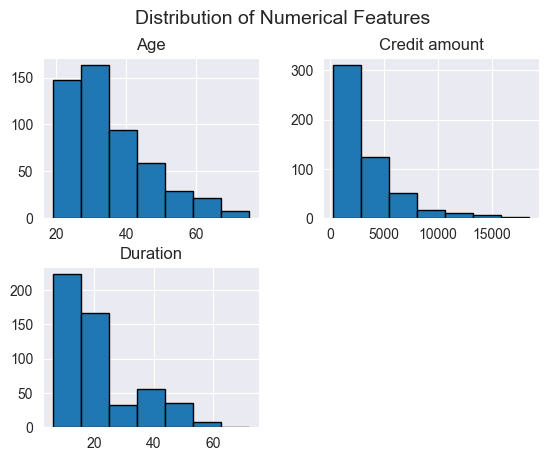

In [59]:
# Visualize the distribution of numerical features
df[["Age","Credit amount","Duration"]].hist(bins=7,edgecolor="black")
plt.suptitle("Distribution of Numerical Features",fontsize=14)
plt.show()

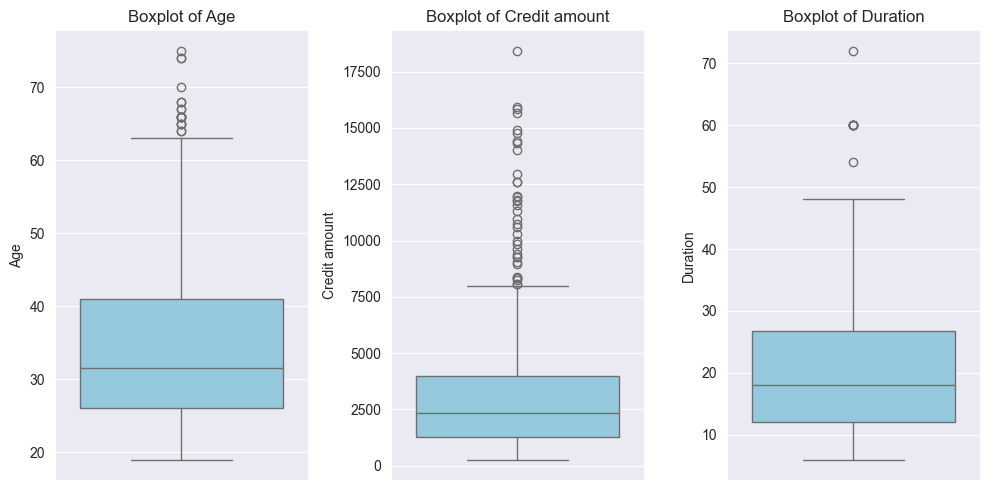

In [60]:
# Boxplots to identify outliers in numerical features
plt.figure(figsize=(10,5))
for i, col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col],color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [61]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [62]:
categorical_cols =["Sex","Job","Housing","Saving accounts","Checking account","Purpose"]

C:\Users\saima\AppData\Local\Temp\ipykernel_27460\3239473734.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="Set2", order=df[col].value_counts().index)
C:\Users\saima\AppData\Local\Temp\ipykernel_27460\3239473734.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="Set2", order=df[col].value_counts().index)
C:\Users\saima\AppData\Local\Temp\ipykernel_27460\3239473734.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="Set2", order=df[col].value_counts().index)
C:\U

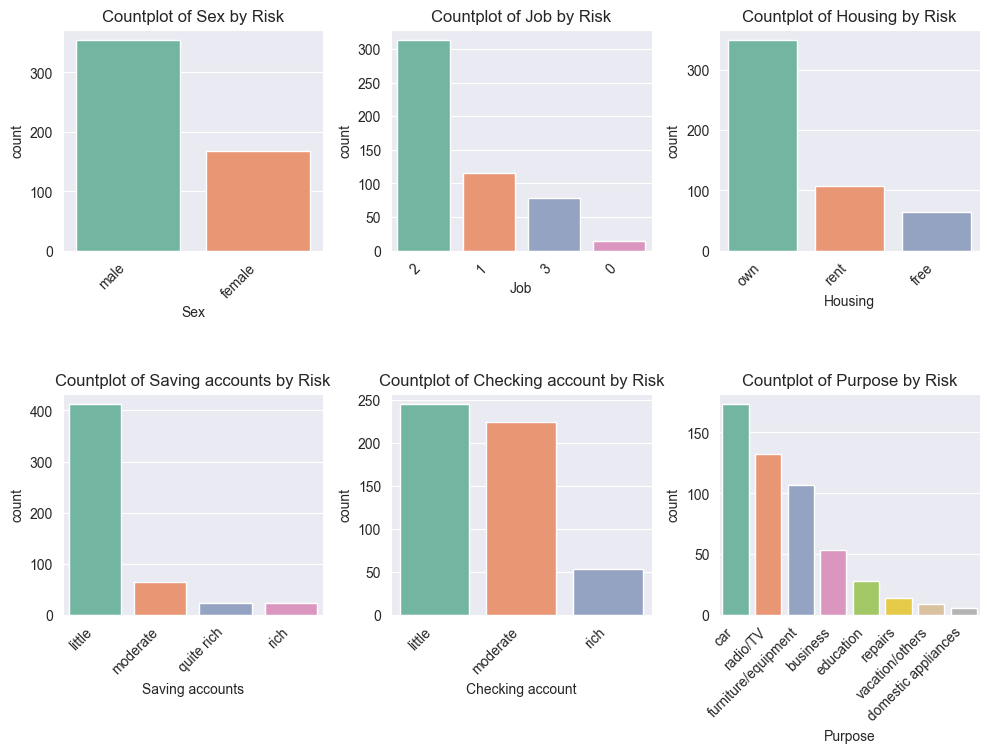

In [63]:
# Countplots for categorical features
plt.figure(figsize=(10,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col,palette="Set2", order=df[col].value_counts().index)
    plt.title(f"Countplot of {col} by Risk")
    plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [64]:
# Correlation matrix for numerical features
corr = df[["Age","Job","Credit amount","Duration"]].corr()
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


<Axes: >

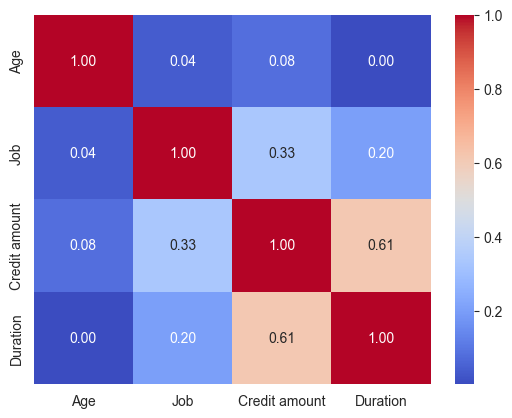

In [65]:
# Heatmap of the correlation matrix
sns.heatmap(corr,annot=True,cmap="coolwarm", fmt=".2f")

In [66]:
df.groupby("Job")["Credit amount"].mean()


Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [67]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [68]:
# Credit amount across housing and loan purpose
pd.pivot_table(df, index="Housing", columns="Purpose", values="Credit amount")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


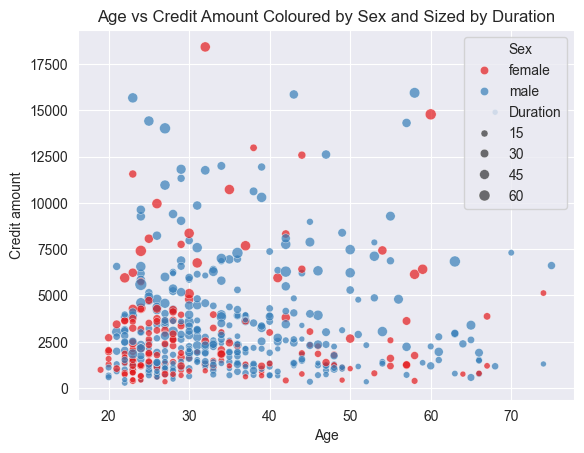

In [69]:
# Relationship between age and credit amount
sns.scatterplot(data=df, x="Age", y="Credit amount", hue="Sex", size="Duration", alpha=0.7, palette="Set1")
plt.title("Age vs Credit Amount Coloured by Sex and Sized by Duration")
plt.show()

C:\Users\saima\AppData\Local\Temp\ipykernel_27460\1618219422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Saving accounts", y="Credit amount", palette="Pastel1")


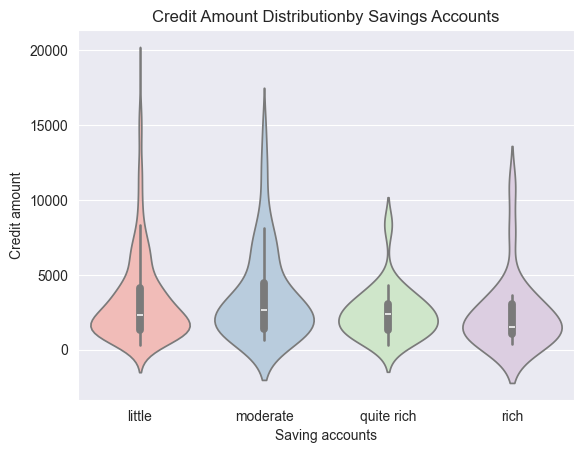

In [70]:
# Distribution of credit amount across savings categories
sns.violinplot(data=df, x="Saving accounts", y="Credit amount", palette="Pastel1")
plt.title("Credit Amount Distributionby Savings Accounts")
plt.show()

In [71]:
df["Risk"].value_counts(normalize=True)*100 # Percentage distribution of risk classes

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

C:\Users\saima\AppData\Local\Temp\ipykernel_27460\3338918325.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Risk",y=col,data=df,palette="Pastel2")
C:\Users\saima\AppData\Local\Temp\ipykernel_27460\3338918325.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Risk",y=col,data=df,palette="Pastel2")
C:\Users\saima\AppData\Local\Temp\ipykernel_27460\3338918325.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Risk",y=col,data=df,palette="Pastel2")


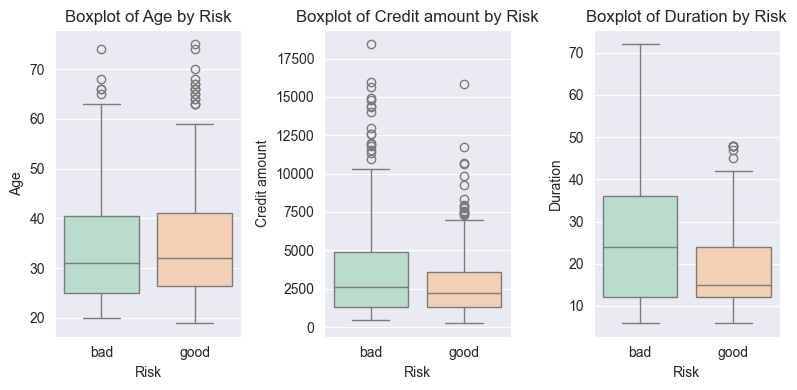

In [72]:
# Compare numerical features across risk categories
plt.figure(figsize=(8,4))
for i,col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(x="Risk",y=col,data=df,palette="Pastel2")
    plt.title(f"Boxplot of {col} by Risk")
plt.tight_layout()
plt.show()

In [73]:
df.groupby("Risk")[["Age","Credit amount","Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


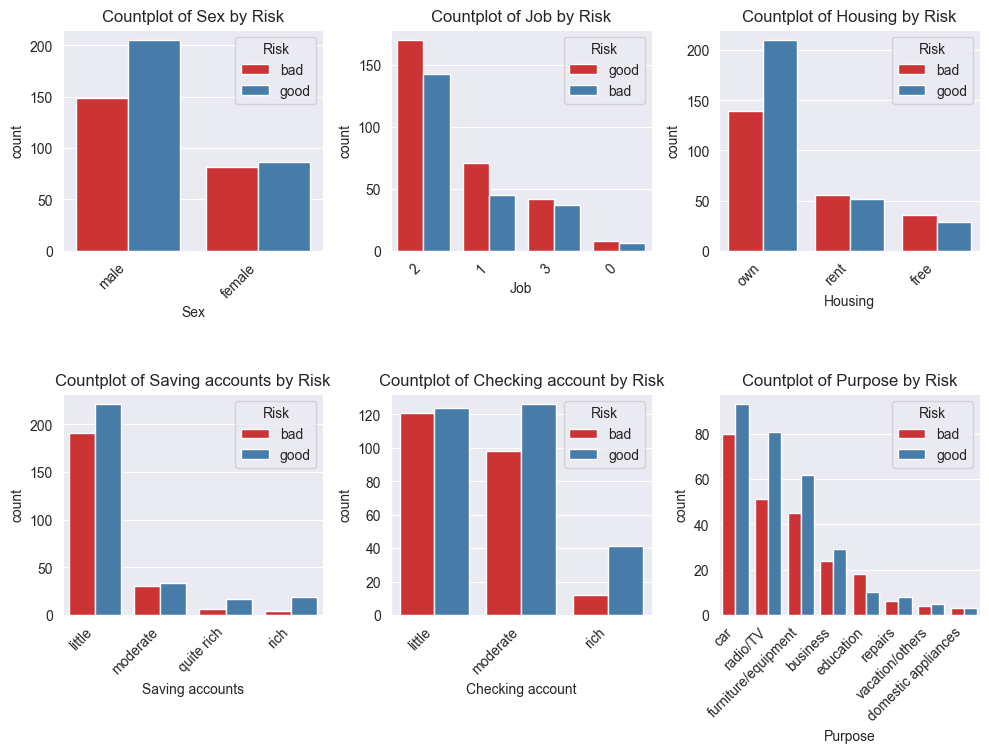

In [74]:
# Risk-wise distribution of categorical features
plt.figure(figsize=(10,10))
for i,col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x=col, hue="Risk", palette="Set1", order=df[col].value_counts().index)
    plt.title(f"Countplot of {col} by Risk")
    plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [75]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [76]:
# Select features and target variable
features=["Age","Sex","Job","Housing","Saving accounts","Checking account","Credit amount","Duration"]
target="Risk"

# Create modeling dataframe
df_model=df[features+[target]].copy()
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


In [77]:
# Identify categorical columns (excluding target)
cat_cols = df_model.select_dtypes(include="object").columns.drop("Risk")
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [78]:
# Encode categorical variables using LabelEncoder
le_dict = {}
for col in cat_cols:
    le= LabelEncoder()
    df_model[col]=le.fit_transform(df_model[col])
    le_dict[col]=le
    joblib.dump(le,f"{col}_encoder.pkl")

In [79]:
# Encode target variable 'Risk'
le_target= LabelEncoder()
df_model[target]=le_target.fit_transform(df_model[target])

# Check encoded target distribution
df_model[target].value_counts()

# Save target encoder
joblib.dump(le_target,"target_encoder.pkl")

['target_encoder.pkl']

In [80]:
df_model.head() # Preview encoded dataset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [81]:
X = df_model.drop(target, axis=1)
y = df_model[target]

In [82]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24
518,30,1,3,1,0,0,3959,36
519,40,1,3,1,0,0,3857,30
520,23,1,2,0,0,0,1845,45


In [83]:
y

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [84]:
# Split data into training and testing sets
# Stratification ensures class distribution is preserved
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [85]:
X_train.shape

(417, 8)

In [86]:
X_test.shape

(105, 8)

In [87]:
# Function to train model with GridSearchCV and return comprehensive evaluation metrics
def train_model(model,param_grid,X_train,y_train,X_test,y_test):
    grid=GridSearchCV(model,param_grid,cv=5,n_jobs=-1,scoring="accuracy")
    grid.fit(X_train,y_train)
    
    best_model=grid.best_estimator_
    y_pred=best_model.predict(X_test)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Get probability predictions for AUC-ROC
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    
    # Generate confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    # Store metrics in dictionary
    metrics = {
        'accuracy': acc,
        'f1_score': f1,
        'auc_roc': auc_roc
    }
    
    return best_model, metrics, grid.best_params_, confusion_mat


In [88]:
# Decision Tree Classifier
dt=DecisionTreeClassifier(random_state=1, class_weight="balanced")
dt_param_grid={
    "max_depth":[3,5,7,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

# Train Decision Tree model with grid search
best_dt, metrics_dt, params_dt, confusion_dt = train_model(
    dt, dt_param_grid, X_train, y_train, X_test, y_test
)

# Display Decision Tree results
print("DECISION TREE RESULTS")
print(f"Accuracy: {metrics_dt['accuracy']:.4f}")
print(f"F1 Score: {metrics_dt['f1_score']:.4f}")
print(f"AUC-ROC: {metrics_dt['auc_roc']:.4f}")
print(f"\nBest Parameters: {params_dt}")
print(f"\nConfusion Matrix:")
print(confusion_dt)


DECISION TREE RESULTS
Accuracy: 0.5810
F1 Score: 0.6207
AUC-ROC: 0.5693

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Confusion Matrix:
[[25 21]
 [23 36]]


In [89]:
# Random Forest Classifier
rf=RandomForestClassifier(random_state=1, class_weight="balanced", n_jobs=-1)
rf_param_grid={
    "n_estimators":[100,200],
    "max_depth":[5,7,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

# Train Random Forest model with grid search
best_rf, metrics_rf, params_rf, confusion_rf = train_model(
    rf, rf_param_grid, X_train, y_train, X_test, y_test
)

# Display Random Forest results
print("RANDOM FOREST RESULTS")
print(f"Accuracy: {metrics_rf['accuracy']:.4f}")
print(f"F1 Score: {metrics_rf['f1_score']:.4f}")
print(f"AUC-ROC: {metrics_rf['auc_roc']:.4f}")
print(f"\nBest Parameters: {params_rf}")
print(f"\nConfusion Matrix:")
print(confusion_rf)

RANDOM FOREST RESULTS
Accuracy: 0.6190
F1 Score: 0.6667
AUC-ROC: 0.6735

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

Confusion Matrix:
[[25 21]
 [19 40]]


In [90]:
# Extra Trees Classifier
et=ExtraTreesClassifier(random_state=1, class_weight="balanced", n_jobs=-1)
et_param_grid={
    "n_estimators":[100,200],
    "max_depth":[5,7,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

# Train Extra Trees model with grid search
best_et, metrics_et, params_et, confusion_et = train_model(
    et, et_param_grid, X_train, y_train, X_test, y_test
)

# Display Extra Trees results
print("EXTRA TREES RESULTS")
print(f"Accuracy: {metrics_et['accuracy']:.4f}")
print(f"F1 Score: {metrics_et['f1_score']:.4f}")
print(f"AUC-ROC: {metrics_et['auc_roc']:.4f}")
print(f"\nBest Parameters: {params_et}")
print(f"\nConfusion Matrix:")
print(confusion_et)

EXTRA TREES RESULTS
Accuracy: 0.6476
F1 Score: 0.6838
AUC-ROC: 0.6912

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Confusion Matrix:
[[28 18]
 [19 40]]


In [91]:
# XGBoost Classifier 
xgb=XGBClassifier(random_state=1, scale_pos_weight=(y_train ==0).sum()/(y_train==1).sum(), use_label_encoder=False, eval_metric="logloss")
xgb_param_grid = {
    "n_estimators": [100, 500],
    "max_depth": [2, 3], 
    "learning_rate": [0.01, 0.05], 
    "subsample": [0.6, 0.7], 
    "colsample_bytree": [0.6, 0.7],
    "min_child_weight": [5, 10], 
    "reg_lambda": [10, 50, 100], 
}

# Train XGBoost model with grid search
best_xgb, metrics_xgb, params_xgb, confusion_xgb = train_model(
    xgb, xgb_param_grid, X_train, y_train, X_test, y_test
)

# Display XGBoost results
print("XGBOOST RESULTS")
print(f"Accuracy: {metrics_xgb['accuracy']:.4f}")
print(f"F1 Score: {metrics_xgb['f1_score']:.4f}")
print(f"AUC-ROC: {metrics_xgb['auc_roc']:.4f}")
print(f"\nBest Parameters: {params_xgb}")
print(f"\nConfusion Matrix:")
print(confusion_xgb)

C:\Users\saima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:199: UserWarning: [23:05:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBOOST RESULTS
Accuracy: 0.6286
F1 Score: 0.6549
AUC-ROC: 0.6455

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 500, 'reg_lambda': 10, 'subsample': 0.7}

Confusion Matrix:
[[29 17]
 [22 37]]


In [92]:
# comprehensive comparison of all models
# Compile all results into a comparison dataframe
model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Extra Trees', 'XGBoost'],
    'Accuracy': [
        metrics_dt['accuracy'], 
        metrics_rf['accuracy'], 
        metrics_et['accuracy'], 
        metrics_xgb['accuracy']
    ],
    'F1 Score': [
        metrics_dt['f1_score'], 
        metrics_rf['f1_score'], 
        metrics_et['f1_score'], 
        metrics_xgb['f1_score']
    ],
    'AUC-ROC': [
        metrics_dt['auc_roc'], 
        metrics_rf['auc_roc'], 
        metrics_et['auc_roc'], 
        metrics_xgb['auc_roc']
    ]
})

# Sort by AUC-ROC score (best overall metric for classification)
model_comparison = model_comparison.sort_values('AUC-ROC', ascending=False)

print("ALL MODELS COMPARISON SUMMARY")
print(model_comparison.to_string(index=False))
print("\nBest Model based on AUC-ROC:", model_comparison.iloc[0]['Model'])

ALL MODELS COMPARISON SUMMARY
        Model  Accuracy  F1 Score  AUC-ROC
  Extra Trees  0.647619  0.683761 0.691231
Random Forest  0.619048  0.666667 0.673545
      XGBoost  0.628571  0.654867 0.645542
Decision Tree  0.580952  0.620690 0.569270

Best Model based on AUC-ROC: Extra Trees


In [ ]:
best_et.predict(X_test)

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [95]:
joblib.dump(best_et,"extra_trees_credit_model.pkl") # Save Extra Trees model

['extra_trees_credit_model.pkl']